## Jesus Eduardo Uicab Briceño
## Erick Hernandez Hernandez
# casos de COVID-19 actualizado 19-nov-20



In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame

In [29]:
data = pd.read_csv('201119COVID19MEXICO.csv', encoding='latin-1')
fecha = '19 de noviembre 2020'

In [30]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-19,1426fb,1,4,10,1,28,10,7,1,...,2,2,99,1,1,3,99,MÃ©xico,97,97
1,2020-11-19,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
2,2020-11-19,1c4583,2,12,9,2,9,9,4,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
3,2020-11-19,0d55c9,2,12,9,1,9,9,16,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
4,2020-11-19,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649000 entries, 0 to 2648999
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9   TIPO_PACIENTE        int64 
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int64 
 14  NEUMONIA             int64 
 15  EDAD                 int64 
 16  NACIONALIDAD         int64 
 17  EMBARAZO             int64 
 18  HABLA_LENGUA_INDIG   int64 
 19  INDIGENA             int64 
 20  DIABETES             int64 
 21  EPOC                 int64 
 22  ASMA                 int64 
 23  INMUSUPR             int64 
 24  HIPERTENSION         int

# Casos positivos acumulados
---
Los individuos considerados como positivos estan indicados por un valor de $1, 2, 3$ en la columna de CLASIFICACION_FINAL. El número de casos positivos en un día son la suma de los individuos con los valores mencionados anteriormente.

In [32]:
total_positivos_acumulados = data[['FECHA_SINTOMAS','CLASIFICACION_FINAL']][data['CLASIFICACION_FINAL'] < 4].groupby('FECHA_SINTOMAS').count().sum()[0]

In [33]:
positivos_acumulados = data[['FECHA_SINTOMAS','CLASIFICACION_FINAL']][data['CLASIFICACION_FINAL'] < 4].groupby('FECHA_SINTOMAS').count().cumsum()
positivos_acumulados.index = pd.to_datetime(positivos_acumulados.index, format='%Y-%m-%d')

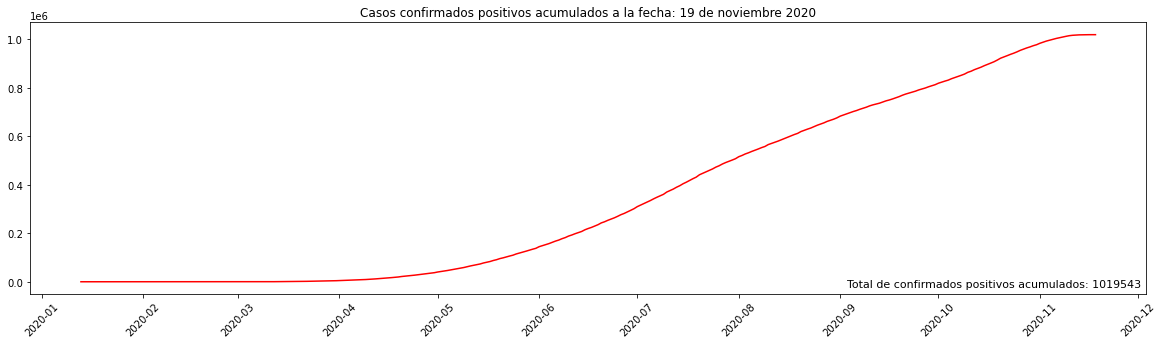

In [34]:
plt.figure(figsize = (20,5))
plt.title('Casos confirmados positivos acumulados a la fecha: ' + fecha)
plt.xticks(rotation=45)
plt.annotate("Total de confirmados positivos acumulados: " + str(total_positivos_acumulados), xy=(1, 0), xycoords='axes fraction', fontsize=11,
                   xytext=(-5, 5), textcoords='offset points',
                   ha='right', va='bottom')
plt.plot(positivos_acumulados, color = 'red')
plt.savefig('positivosacum.png', bbox_inches='tight')

## Casos positivos por sexo
----
Un individuo femenino es representado por un $1$ y uno masculino por un $2$ en la columna de SEXO.

In [35]:
positivos_por_sexo = data['SEXO'][data['CLASIFICACION_FINAL'] < 4].value_counts(normalize=True)

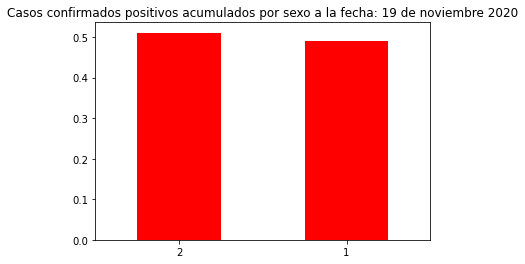

In [36]:
fig = positivos_por_sexo.plot.bar(color = 'red', title = 'Casos confirmados positivos acumulados por sexo a la fecha: ' + fecha)
plt.xticks(rotation=0)
fig.figure.savefig('positivoscum-hm.png', bbox_inches='tight')

## Casos poisitivos por comorbilidades principales
---
Un valor de $1$ representa "Sí", y un valor de $2$ es un "No". 

Mientras que un valor de $98$ representa "SE IGNORA". Para estos casos se considera como un valor faltante.

In [37]:
positivos_comorbilidades = data[['HIPERTENSION', 'DIABETES', 'OBESIDAD', 'EPOC', 'ASMA', 'INMUSUPR', 'OTRA_COM', 'CARDIOVASCULAR', 'RENAL_CRONICA']][data['CLASIFICACION_FINAL'] < 4]
positivos_comorbilidades = positivos_comorbilidades.replace(98, np.nan)

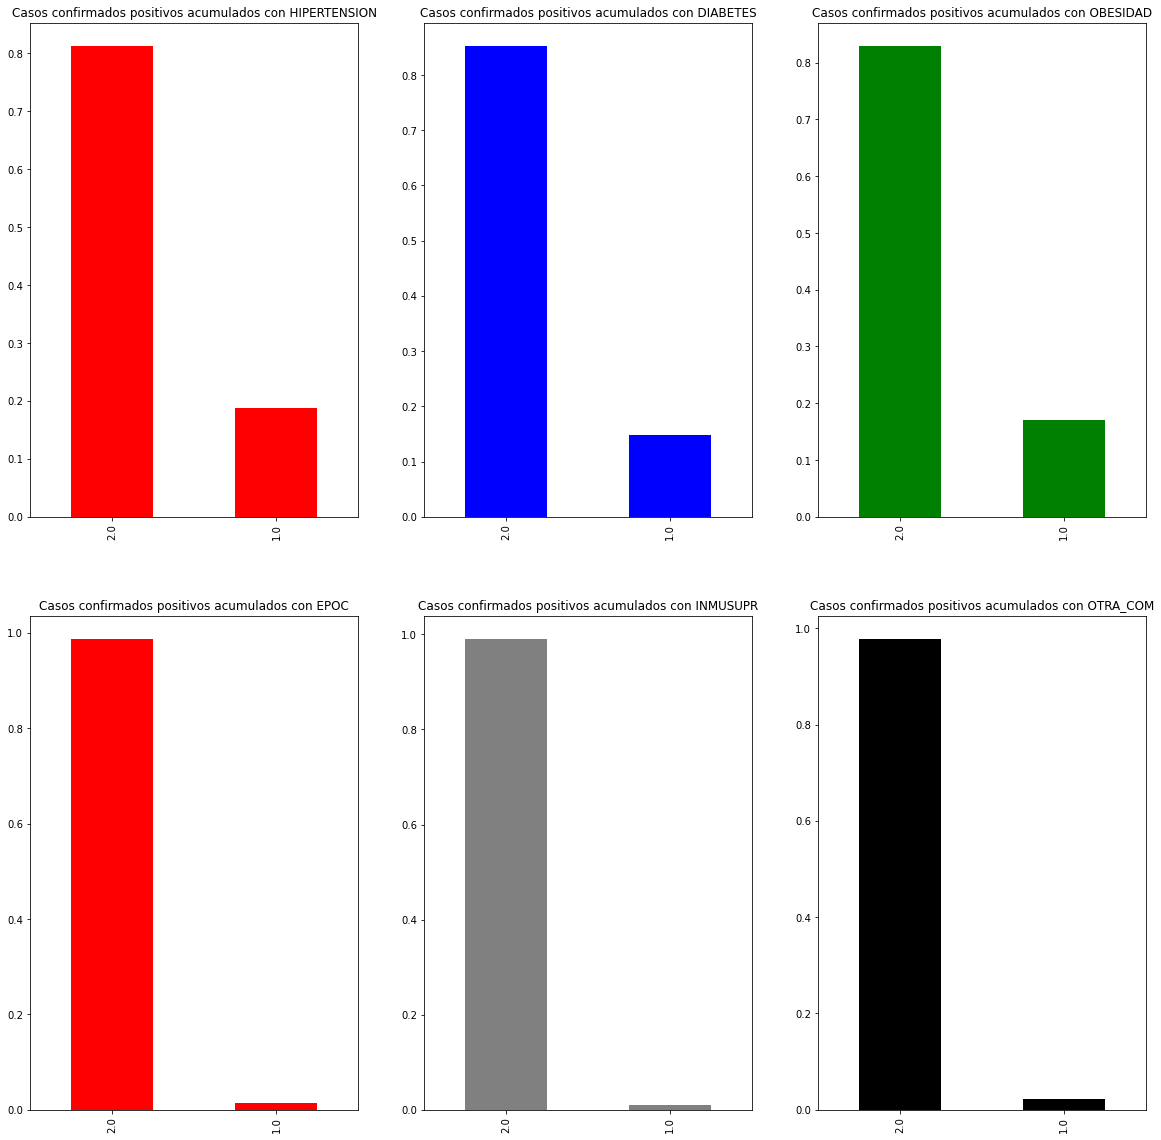

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))

positivos_comorbilidades['HIPERTENSION'].value_counts(normalize=True).plot.bar(ax = axs[0,0], color = 'red', title = 'Casos confirmados positivos acumulados con HIPERTENSION')
positivos_comorbilidades['DIABETES'].value_counts(normalize=True).plot.bar(ax = axs[0,1], color = 'blue', title = 'Casos confirmados positivos acumulados con DIABETES')
positivos_comorbilidades['OBESIDAD'].value_counts(normalize=True).plot.bar(ax = axs[0,2], color = 'green', title = 'Casos confirmados positivos acumulados con OBESIDAD')
positivos_comorbilidades['EPOC'].value_counts(normalize=True).plot.bar(ax = axs[1,0], color = 'red', title = 'Casos confirmados positivos acumulados con EPOC')
positivos_comorbilidades['INMUSUPR'].value_counts(normalize=True).plot.bar(ax = axs[1,1], color = 'gray', title = 'Casos confirmados positivos acumulados con INMUSUPR')
positivos_comorbilidades['OTRA_COM'].value_counts(normalize=True).plot.bar(ax = axs[1,2], color = 'black', title = 'Casos confirmados positivos acumulados con OTRA_COM')


fig.savefig('positivivos_comorbilidades.png', bbox_inches='tight')

## Casos positivos por edad

In [39]:
positivos_edad = data[['EDAD']][data['CLASIFICACION_FINAL'] < 4]
media = positivos_edad.mean()
std = positivos_edad.std()

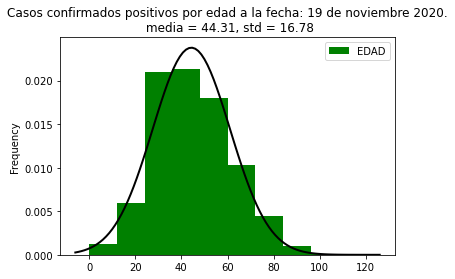

In [40]:
fig = positivos_edad.plot.hist(density=True, color = 'green', title = 'Casos confirmados positivos por edad a la fecha: ' + fecha + '.\n media = ' + str(round(media[0],2)) + ', std = ' + str(round(std[0],2)))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, std)
plt.plot(x, p, 'k', linewidth=2)
fig.figure.savefig('positivos_edad.png', bbox_inches='tight')

# Defunciones acumuladas por COVID-19
----
Las defunciones las obtenemos filtrando a los individuos con resultado positivo a COVID-19 y con fecha de defunción válida.

In [41]:
total_defunciones_acumuladas = defunciones_acumuladas = data[['FECHA_DEF','CLASIFICACION_FINAL']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)].groupby('FECHA_DEF').count().sum()[0]

defunciones_acumuladas = data[['FECHA_DEF','CLASIFICACION_FINAL']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)].groupby('FECHA_DEF').count().cumsum()
defunciones_acumuladas.index = pd.to_datetime(defunciones_acumuladas.index, format='%Y-%m-%d')

## Defunciones por sexo
----


In [42]:
defunciones_por_sexo = data['SEXO'][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)].value_counts(normalize=True)

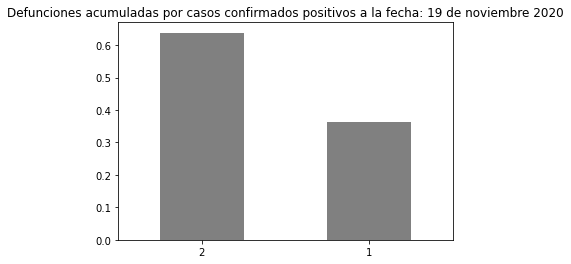

In [43]:
fig = defunciones_por_sexo.plot.bar(color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos a la fecha: ' + fecha)
plt.xticks(rotation=0)
fig.figure.savefig('defuncionescum-hm.png', bbox_inches='tight')

## Defunciones por comorbilidades principales
---

In [44]:
defunciones_comorbilidades = data[['HIPERTENSION', 'DIABETES', 'OBESIDAD']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)]
defunciones_comorbilidades = defunciones_comorbilidades.replace(98, np.nan)

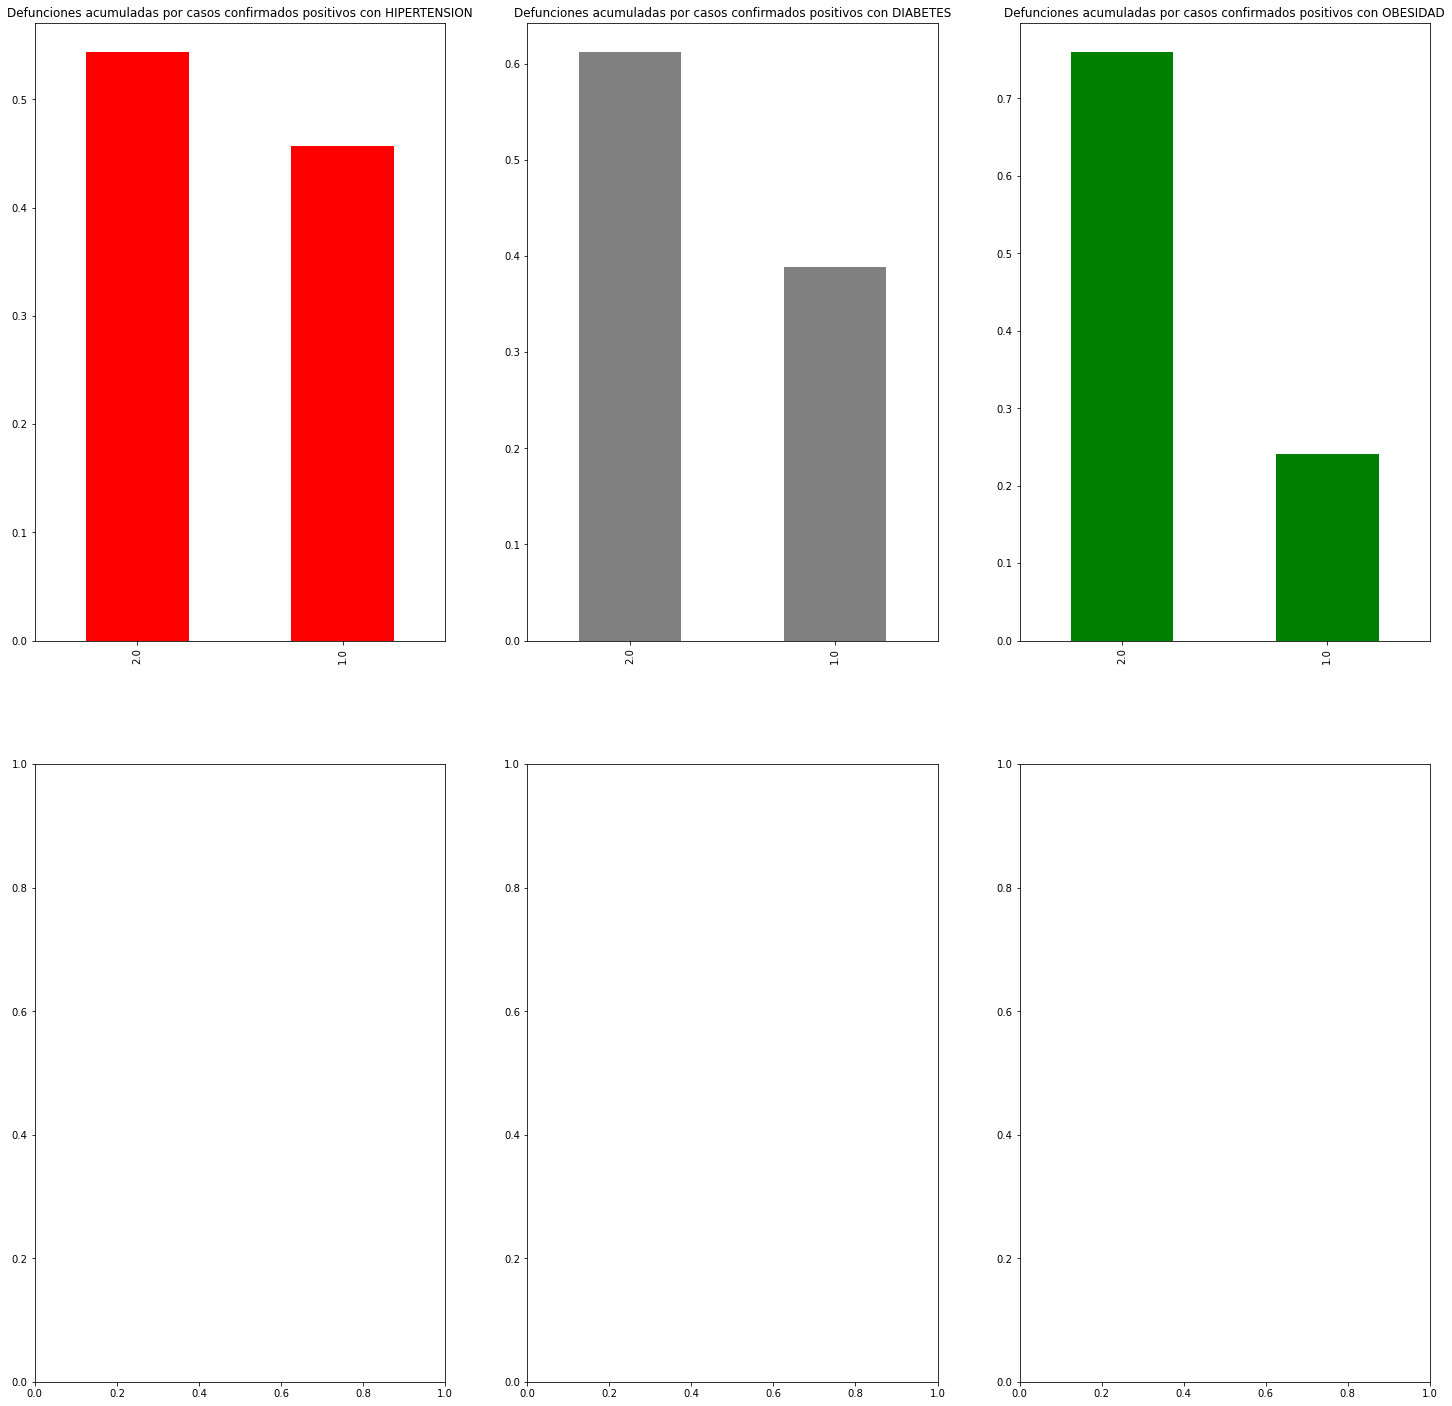

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(25,25))

defunciones_comorbilidades['HIPERTENSION'].value_counts(normalize=True).plot.bar(ax = axs[0,0], color = 'red', title = 'Defunciones acumuladas por casos confirmados positivos con HIPERTENSION')
defunciones_comorbilidades['DIABETES'].value_counts(normalize=True).plot.bar(ax = axs[0,1], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con DIABETES')
defunciones_comorbilidades['OBESIDAD'].value_counts(normalize=True).plot.bar(ax = axs[0,2], color = 'green', title = 'Defunciones acumuladas por casos confirmados positivos con OBESIDAD')

fig.savefig('defunciones_comorbilidades.png', bbox_inches='tight')

## Defunciones por edad
----

In [46]:
defunciones_edad = data[['EDAD']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)]
media = defunciones_edad.mean()
std = defunciones_edad.std()

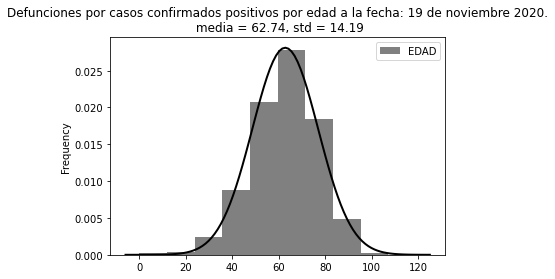

In [47]:
fig = defunciones_edad.plot.hist(density=True, color = 'grey', title = 'Defunciones por casos confirmados positivos por edad a la fecha: ' + fecha + '.\n media = ' + str(round(media[0],2)) + ', std = ' + str(round(std[0],2)))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, std)
plt.plot(x, p, 'k', linewidth=2)
fig.figure.savefig('defunciones_edad.png', bbox_inches='tight')

In [48]:
datos = pd.read_csv("casasboston.csv")
datos2 = pd.read_csv('Titanic.csv')
df = datos[["RM","CRIM", "MEDV", "TOWN", "CHAS"]]
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
       }
dg = DataFrame(Data,columns=['Year','Unemployment_Rate'])

 
df = datos.rename(columns={
	"TOWN":"CIUDAD",
	"CRIM":"INDICE_CRIMEN",	
	"INDUS":"PCT_ZONA_INDUSTRIAL",
	"CHAS":"RIO_CHARLES",
	"RM":"N_HABITACIONES_MEDIO",
	"MEDV":"VALOR_MEDIANO",
	"LSTAT":"PCT_CLASE_BAJA"
})
datos2.head(5)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


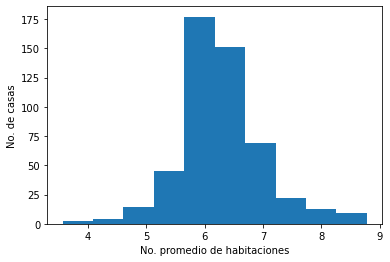

In [49]:
## First graphic comparation
df.N_HABITACIONES_MEDIO.plot.hist()
plt.xlabel("No. promedio de habitaciones")
plt.ylabel("No. de casas")
plt.show()

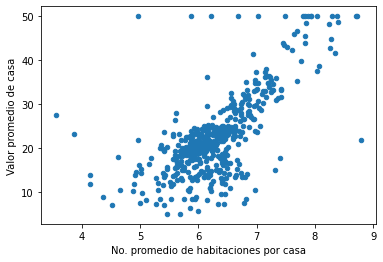

In [50]:
## Second graphic distribution
df.plot.scatter("N_HABITACIONES_MEDIO", "VALOR_MEDIANO")
plt.xlabel("No. promedio de habitaciones por casa")
plt.ylabel("Valor promedio de casa")
plt.show()


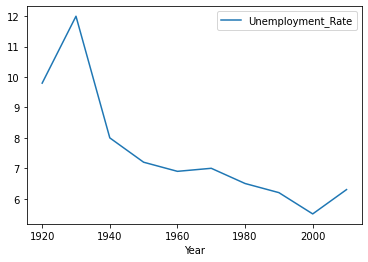

In [51]:
dg.plot(x ='Year', y='Unemployment_Rate', kind = 'line')
plt.show()

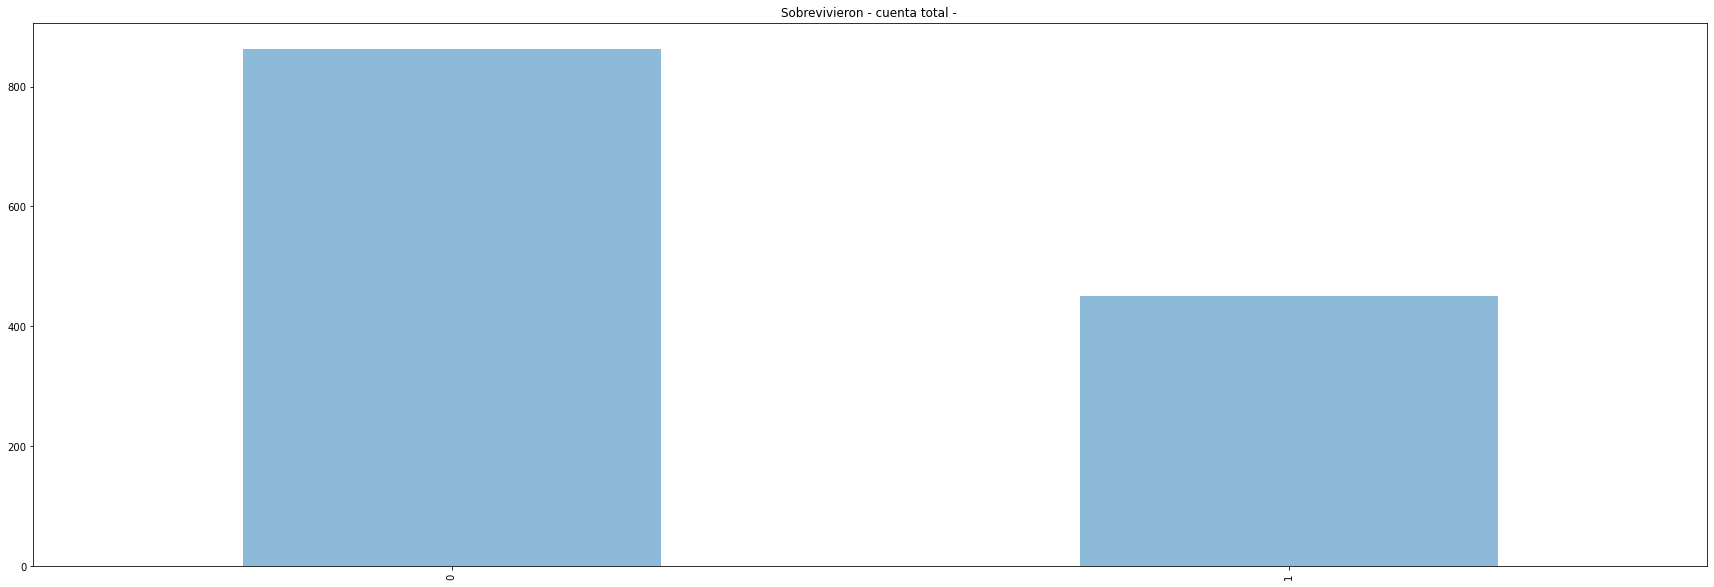

In [52]:
fig = plt.figure(figsize =(30,10))
datos2.Survived.value_counts().plot(kind = "bar",alpha=0.5)
plt.title("Sobrevivieron - cuenta total - ")
plt.show()